# Analysis of Qualities of Anime

#### Spring 2024 Data Science Project

Ryan Jiang and Chukwubuike Peterson

Contribution Checkpoints:

A: Project idea - 5%
B: Dataset Curation and Preprocessing - 15%
C: Data Exploration and Summary Statistics - 10%
D: ML Algorithm Design/Development - 25%
E: ML Algorithm Training and Test Data Analysis - 20%
F: Visualization, Result Analysis - 15%
G: Final Tutorial's Conclusion - 1%

Member 1: Chukwubuike Peterson Contribution: 90% (did not contribute to B). 

Member 2: Ryan Jiang, Contribution: 100% 

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

**Chukwubuike Peterson on 5/7/24**

**Ryan Jiang on 5/7/24**

Chukwubuike helped out with the setting up the github repo and moving over the content for part 2 and 3 and worked on part 4 and conclusion

Ryan wrote the intro and heavily edited part 2,3,4,5

## 1. Introduction

Japanese animation, or anime, has transcended boundaries and exploded in popularity in recent years. Once a niche interest in the West, a 2023 survey reveals a dedicated viewership: [25% of Millennials and a staggering 42% of Gen Zs watch anime weekly](https://www.polygon.com/c/2024/1/22/24034466/anime-viewer-survey-research). This trend aligns with projections of the anime industry reaching a massive [$62.7 billion by 2032](https://finance.yahoo.com/news/anime-market-reach-usd-62-120000412.html). Anime's cultural impact extends beyond viewership - celebrities and artists openly reference it, further solidifying its place in popular culture. However, popularity paints an incomplete picture. As anime embeds itself within the next generation's cultural landscape, a critical data gap emerges. This has sparked an interest in answering the question: What makes anime appeal with viewers? 
    
Specifically recognizing that fan preferences constantly evolve, we want to know past trends and also predict what qualities resonate with viewers. Essentially, this study seeks to anticipate what stories and styles will capture audiences in this ever-evolving landscape of anime. Further analysis can reveal hidden connections between genres and popularity and can be leveraged to know which contents are more likely to be successful. Combining these findings from quantitative research with external qualitative research can offer a more complete understanding of anime's impact and its influence within society. Overall, this study will attempt to uncover any relationships between variables of anime and other factors. 

## 2. DATA PROCESSING:

The initial stage of our process involves searching online for relevant data on anime and we primarily focused on obtaining information on [Kaggle](www.kaggle.com), a website which had a plethora of free and public datasets. Fortunately, we managed to discover a [relevant anime dataset](https://www.kaggle.com/datasets/arnavvvvv/anime-dataset) which had scraped data from MyAnimeList, a popular anime forum and review site. This dataset includes valuable information about each individual anime series such as the period in which it aired, how many episodes, the general sentiment and ranking, and also the genres. 


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("animes.csv")

Before we can actually analyze the data, we first must clean and process it into a format that will allows us to easily access the data points. We removed potential duplicates because when we first scanned the data, we noticed that there could have been anime that were scraped twice. All of the data columns were string types when the csv file was initally read, so we had to convert them into the appropiate type. 

We first changed the type of the 'members' and 'popularity' columns into integers. We then converted the string in the 'genre' column back into string arrays, so we can analyze it later. We also dropped the link and image url column because we will not be using them as it they are either inaccessible or not relevant. 

Finally, we realized that the format for 'aired' column was inconsistent due to it originally being a string that comprises of two dates. However, this leads to the problem where some animes only aired for a single day and some of the dates were missing either the day or month. In order to remedy this, we are only going to check when the anime first aired. We also will use regex to check every date and if it is missing, we will be adding in missing numbers by adding '1' for missing day and 'January' for missing month. We then converted all of the columns into datetime type so we can compare and filter it later. 

At the very end, we also removed any rows which had empty slots for information. We also purposefully replaced empty summary entries with a singular space since we might later need to count the frequency of certain words in the synposis. After this, we have basically cleaned our data and it is ready for the next step.  

In [3]:
import matplotlib.pyplot as plt
import scipy
import re
# Remove duplicates
df = df.drop_duplicates()
# changing columns types from string to int
df['members'] = df['members'].astype(int)
df['popularity'] = df['popularity'].astype(int)
# changing string back into string array with each genre being its own element in array
df['genre'] = df['genre'].apply(eval)
#dropping the image url and link from table since it won't be needed
df = df.drop('img_url', axis=1)
df = df.drop('link', axis=1)
# converting string into two dates and only getting the first date
df['aired'] = df['aired'].str.split(' to ').str[0]
#function that will format the string into a datetime object to be comparable, also adds in missing data if missing month and or day.
def parse_date(date_str):
    formats = [r'^\w+ \d+\, \d{4}$', r'^\w+ \d{4}$', r'^\d{4}$']
    for fmt in formats:
      x = re.search(fmt, date_str)
      if (x):
        x = str(x.group())
        if fmt == r'^\w+ \d{4}$':
          x = x.replace(" ", " 1, ")
        elif fmt == r'^\d{4}$':
          x = "January 1, "+ x
      return pd.to_datetime(x)
    return pd.NaT
df['aired'] = df['aired'].apply(parse_date)
df['synopsis'] = df['synopsis'].fillna(' ')
df = df.dropna()
display(df)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",2015-10-04,25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",2014-10-10,22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",2017-07-07,13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",2009-04-05,64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",2017-01-06,1.0,214621,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"[Action, Comedy, Super Power, Martial Arts, Sh...",2011-01-01,1.0,34155,2382,1728.0,7.50
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"[Slice of Life, Comedy, Supernatural]",2018-01-12,12.0,61459,1648,1727.0,7.50
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","[Slice of Life, Comedy, Shounen]",2011-09-27,12.0,67422,1547,1548.0,7.56
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",[Action],2016-07-09,1.0,41077,2154,1544.0,7.56


## 3. Exploratory data analysis

Before we undergo creating a model for predicting, we should first get a big picture of the data. This will involve performing statistical analysis in order to understand how the variables relate with each other. 

The first thing that we will perform is a Z-Test in order to understand if there could be correlations between audience rating and if an anime is a specific genre. We hypothesize that anime with the 'action' genre tag would perform much better. We perform a Z test to see if the average score for animes with the Action genre is greater then 7
- Z-Test Hypothesis:
- HA: The mean score of Anime with "Action" genre will be greater or equal to 7  
- H0: The mean score of Anime with "Action" genre will be less than 7
 

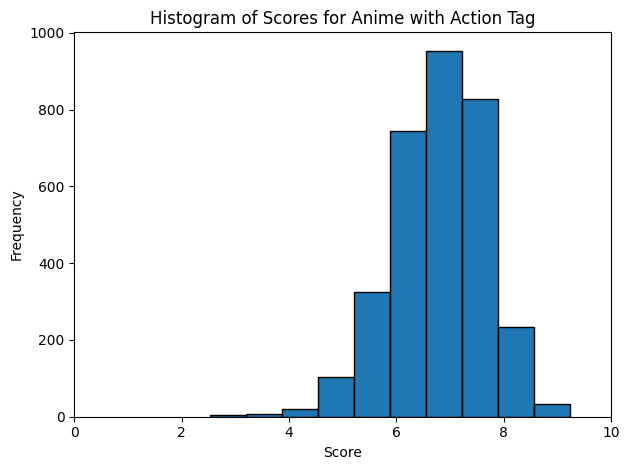

Median score of Action entries: 6.83
Estimated p-value (One-tailed test): 0.40276963980290836
The result is not statistically significant (fail to reject null hypothesis).


In [4]:
#getting anime with genre tag
action_entries = df[df['genre'].apply(lambda x: 'Action' in x)]
# calculating mean and standard deviation for use in z test
mean = action_entries['score'].mean()
std_dev = action_entries['score'].std()
# formatting graph.
plt.hist(action_entries['score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Anime with Action Tag')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()
# median used because graph is skewed
median_score = action_entries['score'].median()
print("Median score of Action entries:", median_score)
#hypothesis score
score_value = 7
#z test and p value
z_score = (score_value - mean) / std_dev
p_value = 1 - scipy.stats.norm.cdf(z_score)
print("Estimated p-value (One-tailed test):", p_value)
#prints results of p_value and hypothesis testing
if p_value < 0.05:
    print("The result is statistically significant (reject null hypothesis).")
else:
    print("The result is not statistically significant (fail to reject null hypothesis).")


Since the graph is skewed, we can use the median as an indicator, and the median of every Action anime's score is 6.88 which is below 7. We also look at the p-value and since it is above 0.05, we fail to reject the null hypothesis. This means that our hypothesis is likely not supported by the data and that we will have to perhaps introduce more variables to test out further relationships. 

For our second test, We also want to glimpse at the potential behavior of viewers of anime in general, specifically looking at the trends in the score in total. We will conduct a boxplot to see if we have any outliers in our data when it comes to scores of anime.

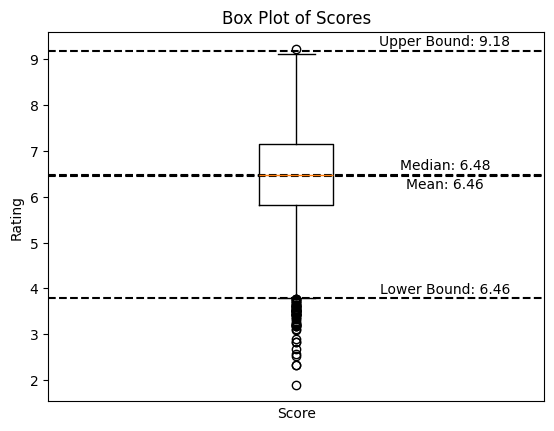

Number of upper outliers: 1
Number of lower outliers: 61


In [5]:
#creating boxplot
score_data = df['score']
plt.boxplot(score_data)
plt.xlabel('Score')
plt.ylabel('Rating')
plt.title('Box Plot of Scores')
plt.xticks([])
#getting the mean, min, and max then displaying it
mean_score = score_data.mean()
min_score = score_data.min()
max_score = score_data.max()
q1 = score_data.quantile(0.25)
q3 = score_data.quantile(0.75)
q2 = score_data.quantile(0.5)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
plt.text(1.3, mean_score-0.2, f"Mean: {mean_score:.2f}", ha='center', 
va='center')
plt.text(1.3, upper_bound+0.2, f"Upper Bound: {upper_bound:.2f}", ha='center', 
va='center')
plt.text(1.3, lower_bound+0.2, f"Lower Bound: {mean_score:.2f}", ha='center', 
va='center')
plt.axhline(y=lower_bound, color='black', linestyle='dashed', label='Lower Bound')
plt.axhline(y=upper_bound, color='black', linestyle='dashed', label='Upper Bound')
plt.axhline(y=mean_score, color='black', linestyle='dashed', label='Mean')
# getting median to compare with mean later
plt.text(1.3, q2+0.2, f"Median: {q2:.2f}", ha='center', 
va='center')
plt.axhline(y=q2, color='black', linestyle='dashed', label='q2')

plt.show()
# seeing how many outliers there are, and what type they are
lower_outliers = df[df['score'] < lower_bound].shape[0]
upper_outliers = df[df['score'] > upper_bound].shape[0]
print(f"Number of upper outliers: {upper_outliers}")
print(f"Number of lower outliers: {lower_outliers}")


There are 62 lower outliers when it comes to score of anime and one higher outlier, suggesting that anime is generally well received and when there are outliers or bad anime, it is a noticable exception. In general, we can see that almost all of the scores fall roughly between 6.5 and 9.2. We also can see that the median and mean are almost the same, meaning that the scores when plotted can be either a normal or uniform distribution. However, when we plot the score as a histogram, we can get a normal distribution that is shifted to the right, but that still means that it is skewed to the left by a bit. 

Text(0, 0.5, 'Frequency')

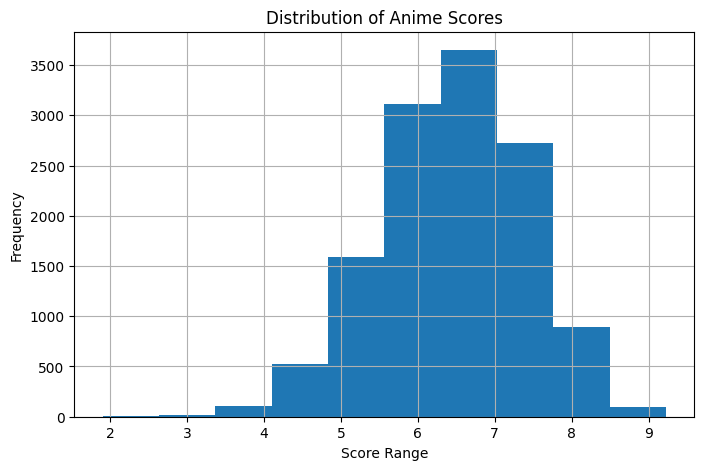

In [6]:
df['score'].hist( bins=10, figsize=(8, 5))
plt.title("Distribution of Anime Scores")
plt.xlabel("Score Range")
plt.ylabel("Frequency")


We also wanted to take a cursory look at the top 100 anime and see which genre occurs the most out of all of them. We were curious if there was certain genres which correlate to a higher rank of an anime. It is important to note that score and rank are different since the lower the rank, the better it is considered, and also each rank are matched one-to-one with an anime. 

After doing a bar chart of the frequency of the appearance of genres within the top 100 anime, we discovered that the most common genre amongst the top 100 ranked animes is 'Drama' with 50 entries, followed by 'Action' tied for second with 46, and 'Comedy' and 'Shounen' being tied for third. 


{'Action': 39, 'Military': 6, 'Adventure': 22, 'Comedy': 44, 'Drama': 47, 'Magic': 4, 'Fantasy': 19, 'Shounen': 40, 'Thriller': 7, 'Sci-Fi': 27, 'Super Power': 8, 'Romance': 13, 'Supernatural': 36, 'School': 17, 'Mystery': 21, 'Historical': 24, 'Parody': 12, 'Samurai': 12, 'Space': 3, 'Game': 2, 'Seinen': 13, 'Slice of Life': 23, 'Sports': 9, 'Mecha': 6, 'Vampire': 5, 'Demons': 6, 'Music': 1, 'Josei': 2, 'Martial Arts': 1, 'Horror': 2, 'Police': 3, 'Psychological': 7, 'Shoujo': 5, 'Dementia': 1}


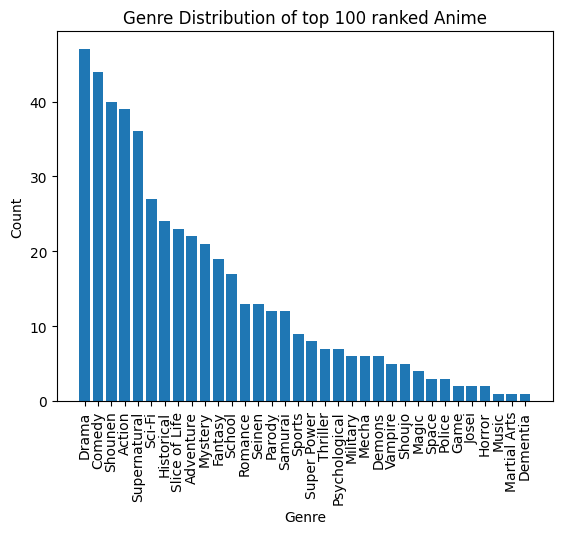

In [7]:
#getting top 100 rank by getting the lowest int values. 
lowest_ranked = df.nsmallest(100, 'ranked')
# iterating to count the genres, uses a dictionary to do so
genre_counts = {}
for genres in lowest_ranked['genre']:
  for genre in genres:
    if genre in genre_counts:
      genre_counts[genre] += 1
    else:
      genre_counts[genre] = 1
print(genre_counts)

#converts dictionary into list which can be used for plotting
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_names, genre_counts = zip(*sorted_genres)

# Creates a bar chart
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution of top 100 ranked Anime")
plt.xticks(rotation=90) 

plt.show()

### Conclusion from our preliminary analysis:

We tried a z-test for the first test and it was inconclusive, suggesting that for certain genres such as 'action', there might not be an obvious correlation between a genre and resulting scores. 
Looking at the second test, we can see that the scores of the animes are distibuted skewed to the left. This means that we might need to use logarithmic functions later on in order to correct it for predictions and we can expect to see most scores falling in between 6-9. 
We also took a look at ranks and genre and noticed that certain genres are represented more when it comes to the more popular anime. We can assume that there could be a correlation here, but we must remain cautious until we construct a model to prove it. Overall, we can conclude that there is a potential to see 'ranked' variable, match up with 'genre'. 

## 4. Primary Analysis

In order to create an accurate model of our data, we must utilize various modeling techniques in order to predict values for data points that are not already inside our data. An example would be given the genre of a new anime, can we estimate the score?

In this case, we are choosing to do regression modeling because we have labeled data. 

The following are packages that will be required in order to build a machine learning model. 

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

The provided code is performing a simple linear regression analysis using the 'popularity' feature to predict the 'ranked' value.

We decided to test this because both 'ranked' and 'popularity' are both considered better when lower AKA closer to zero. Both features share the feature of being one to one, meaning that one anime's 'popularity' value will never be the same as another anime, the same being said for the 'ranked' value. 

First, it selects the 'popularity' column from the DataFrame df and reshapes it into a 2D array, which is the required input shape for the scikit-learn model. The target variable 'ranked' is also selected.

Then, it creates an instance of the LinearRegression model from scikit-learn.

The model is trained using the fit method, with 'popularity' as the predictor and 'ranked' as the target variable.

After training, the model's performance is evaluated using the coefficient of determination which is R^2. Since our value is 0.68, we can state that our model can predict 68% of the points accurately, which is okay, but we can probably do better with a different model. 

In [9]:
# Select relevant features
X = df['popularity'].values.reshape(-1, 1)  # Reshape to make it a 2D array
y = df['ranked'].values
# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)
# Evaluate the model
r_squared = model.score(X, y)
print("R-squared:", r_squared)


R-squared: 0.6838431284871884


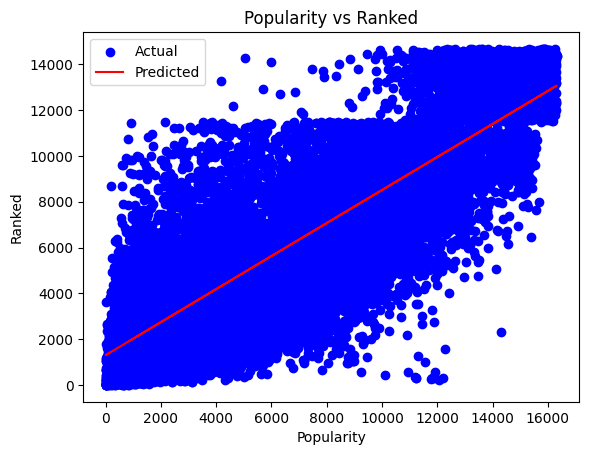

In [10]:
# Predict y values
y_pred = model.predict(X)



# Create a scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Predicted')


# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Ranked')
plt.title('Popularity vs Ranked')
plt.legend()

# Show the plot
plt.show()

In this model, we can see a positive relationship between the two variables of popularity and score. This would hint at a potential relationship between how popular an anime is, and how highly people rank it. 

In the second linear regression model, we want to see if 'ranked' variable affects the 'score' variable. We will use the same code except with different X and Y variables. Looking at the R^2 value of 0.8 and also eyeballing the graph, we can see that there is a moderate to strong negative relation between the two variables. Further looking at the graph, we can see that it is negative relation as when the 'ranked' are high, the 'score' is low, suggesting that when you see a anime with a higher score on MyAnimeList, chances are that it will also have a rank closer to 0. 

R-squared: 0.7424381475495256


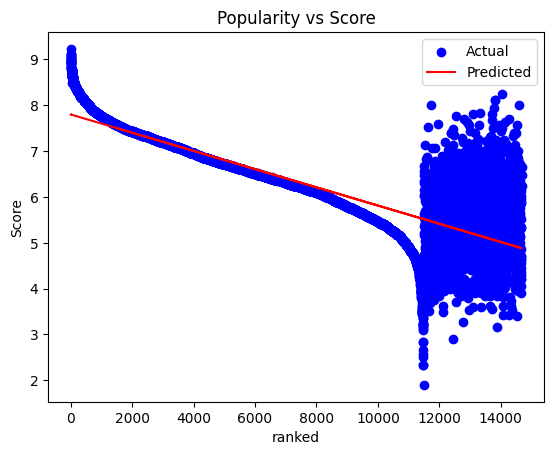

In [11]:
# Select relevant features
X = df['ranked'].values.reshape(-1, 1)  # Reshape to make it a 2D array
y = df['score'].values
# Create the model
model = LinearRegression()

# Train the model
model.fit(X, y)
# Evaluate the model
r_squared = model.score(X, y)
print("R-squared:", r_squared)


# Predict y values
y_pred = model.predict(X)

# Create a scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel('ranked')
plt.ylabel('Score')
plt.title('Popularity vs Score')
plt.legend()

# Show the plot
plt.show()

Something else that we wanted to test was whether or not nostalgia plays a role in positively influencing people's perceptions of anime. The idea is that older anime will gradually gain a more positive influence in people's minds and thus their score will go up. We would like to create a model that can predict the score of an anime based on its year. 

However, when we tested using linear regression, we were dissapointed to see an erratic shaped scatter plot and an R^2 value of 0.015 which means the graph is incredibly inaccurate. 

R-squared: 0.01595724717522773


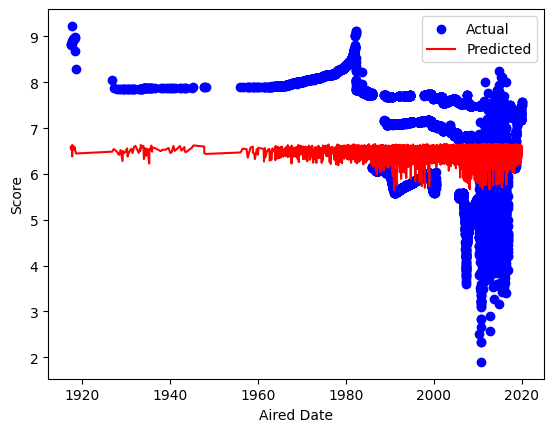

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df['year'] = df['aired'].dt.year
df['month'] = df['aired'].dt.month
df['day'] = df['aired'].dt.day

# Define the features (X) and target variable (y)
X = df[['year', 'month', 'day']]  # Using year, month, and day as features
y = df['score']

# Creates and fits the linear regression model
model = LinearRegression()
model.fit(X, y)

df_sorted = df.sort_values(by='aired')

# Creates a scatter plot of the actual data
plt.scatter(df_sorted['aired'], y, color='blue', label='Actual')

# Predicts popularity using the model
y_pred = model.predict(X)
r_squared = model.score(X, y)

print("R-squared:", r_squared)
# Plots the regression line
plt.plot(df_sorted['aired'], y_pred, color='red', label='Predicted')
plt.xlabel('Aired Date')
plt.ylabel('Score')
plt.legend()
plt.show()


In order to double check to see if the outliers with airing dates pre-WW2 affected the results drastically, we decided to limit points using Random Sample Consensus. Through this, we were able to limit the influence of outliers, especially the older animes. Through this new model, we were able to get a higher R^2 value and coefficient of -0.0004, it suggests a minute negative relationship between 'Aired Date' and 'Score', with 'Aired Date' explaining only 30% of the variability in 'Score'. We can assume that air date has minimum impact on the score. 

Coefficients:  -0.004703257819062664
Intercept:  16.233110926480784
MSE:  1.0098382395373477
Coefficient of determination: 0.30114949038648053


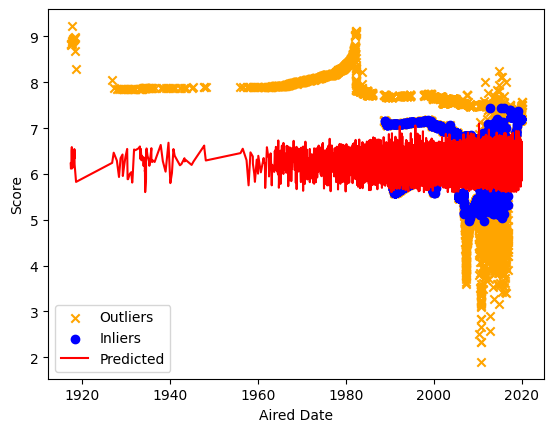

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
# Fit RANSAC model
ransac = RANSACRegressor()
ransac.fit(X, y)

# Obtain mask for inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
Xin = X[inlier_mask]
Yin = y[inlier_mask]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X[inlier_mask], y[inlier_mask])
score = model.score(X[inlier_mask], y[inlier_mask])

# Predict using the model
Y_pred = model.predict(X)

print('Coefficients: ', model.coef_[0]) 
print('Intercept: ', model.intercept_)
print('MSE: ',mean_squared_error(y, Y_pred))
print('Coefficient of determination:',score)

# Plotting
plt.scatter(df_sorted['aired'][outlier_mask], y[outlier_mask], color='orange', marker='x', label='Outliers')
plt.scatter(df_sorted['aired'][inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.plot(df_sorted['aired'], Y_pred, color='red', label='Predicted')
plt.xlabel('Aired Date')
plt.ylabel('Score')
plt.legend()
plt.show()


One of the most important goals that was established during the introduction is seeing if which specific genres influence the scores of animes. In order to go through this, we utilized multilabel binarizer because it is similiar to a hot one encoding, but allows for recognizing mutiple genre for each sample. However, this process is messy and requires culling empty rows or filling them up with similiar genres. 

In [14]:
#display(df)
# Use MultiLabelBinarizer to encode genres
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Concatenate the encoded genres with the original dataframe
data_encoded = pd.concat([df, genre_df], axis=1)

# Select relevant features (genres) and target variable (score)
X_genres = data_encoded.drop(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members', 'popularity', 'ranked', 'score'], axis=1)
y_genres = data_encoded['score']

# Check for missing values in y_genres
missing_values = y_genres.isnull().sum()
print("Number of missing values in y_genres:", missing_values)

if missing_values > 0:
    print("Removing rows with missing values...")
    data_encoded.dropna(subset=['score'], inplace=True)
    X_genres = data_encoded.drop(['day','month','year','uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members', 'popularity', 'ranked', 'score'], axis=1)
    y_genres = data_encoded['score']
    
# Fill missing values in X_genres
X_genres.fillna(X_genres.mean(), inplace=True)

# Remove rows with missing values in y_genres
data_encoded.dropna(subset=['score'], inplace=True)
y_genres = data_encoded['score']
#display(X_genres.columns)

Number of missing values in y_genres: 3677
Removing rows with missing values...


After cleaning up invalid rows, we want to see what the model believes are the top 10 more influential genres. 

In [15]:
# Create the model
model_genres = LinearRegression()
X_genres.fillna(X_genres.mean(), inplace=True)
print(model_genres)
# Train the model
model_genres.fit(X_genres, y_genres)

# Evaluate the model
r_squared_genres = model_genres.score(X_genres, y_genres)
print("R-squared for genres:", r_squared_genres)

# Get the coefficients
coefficients = pd.Series(model_genres.coef_, index=X_genres.columns)

# Sort coefficients by magnitude
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Print the top 10 genres that have the most impact on the score
print("Top 10 genres affecting the score:")
print(sorted_coefficients.head(10))

LinearRegression()
R-squared for genres: 0.04315531043988452
Top 10 genres affecting the score:
Thriller         0.454072
Josei            0.318279
Psychological    0.307075
Harem            0.278084
Mystery          0.277330
Dementia         0.276953
Kids             0.251391
Horror           0.248545
Demons           0.245289
Military         0.227763
dtype: float64


We are now going to plot the top ten genres to get more of a visual representation of what our model found. According to the this model, whenever an anime is considered a Thriller, it has a higher chance of scoring a better score with a predicted 0.45 increase compared to similiar non-Thriller anime. 

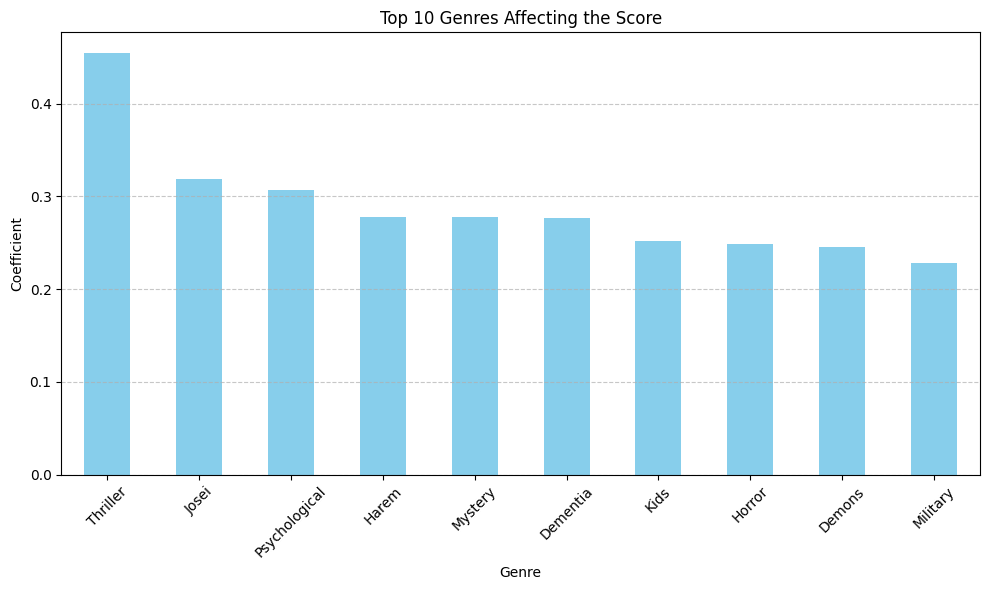

In [16]:
# Plot the coefficients
plt.figure(figsize=(10, 6))
sorted_coefficients.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres Affecting the Score')
plt.xlabel('Genre')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Insights and Conclusion:



Based off of our models and observations, we can conclude several points:


1. The popularity of an anime has a very strong correlation with its ranking within the community. The major difference between the two is that popularity is how many people like it, while rank is comparing the quality of the show.
Based off of our model, we can state that people generally like to enjoy anime that are considered high quality. 

2. We also did a similar linear regression model comparing popularity and score. By comparing both of these, we can see that there is a strong correlation between the two. Through this we can assume that the more popular an anime is, the better the score/rating it receives.

3. Our third model sought to answer the question of whether aired date has a correlation with score. We initially created a linear regression model similiar to the first two, but after realizing that perhaps pre-WW2 animations could be posing as an outlier, we decided on Random Sampling Consensus, which did eliminate outliers, but the results were somewhat dissapointing. The model could only explain 30% and had an almost miniscule negative coefficient. We could say that the older a show is, the better the say, however, we are not as confident as we want to be. 

4. In our last model and most anticipated, we created a model which would see which genres had the highest impact on a show's score. We utilized MultiLabel Binarizer which allows you to create binary for the mutiple possible genres a show can have. We then created a linear regression model which allowed use to see which genre has the biggest effect. We printed out the top 10, and on the top of the list is the Thriller tag. This means that if an anime has the genre of Thriller, there is a higher chance of scoring a score with a 0.45 increase compared to similiar types of anime that are not Thrillers.  

The imformation we discovered could be benficial to studios who might be trying to create a new popular anime. We can also use it to disprove the sentiment that nostalgia plays a major role in older anime's score. If we were to conduct further research on this topic, we would like to perhaps create a timeline of genre occurences throughout the years. We also would like to work with more recent shows since this dataset is outdated by a few years. 

Overall, we went to a process of brainstorming ideas, cleaning and processing data, exploring and visualizing data, creating models to test hypothesis, and finally concluding and making recommendations.

All relevant files we used for this project can be [found here](https://github.com/ChuckVisuals/ChuckVisuals.github.io)